In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [19]:
# Load the dataset
file_path = "../datasets/sales_data.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display basic info and first few rows
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
# Handling Missing Values
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['OutletSize'] = df['OutletSize'].fillna(df['OutletSize'].mode()[0])

print(df.isnull().sum())

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64


In [21]:
# Feature Engineering
df['FatContent'] = df['FatContent'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['OutletAge'] = 2025 - df['EstablishmentYear']

df.drop(columns=['EstablishmentYear', 'ProductID', 'OutletID'], inplace=True)

In [22]:
df

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletSize,LocationType,OutletType,OutletSales,OutletAge
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,16
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,27
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,38
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,38
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,23
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,21
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,16


In [5]:
# Encoding Categorical Variables
le = LabelEncoder()
for col in ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType']:
    df[col] = le.fit_transform(df[col])

In [6]:
# Splitting Data
X = df.drop(columns=['OutletSales'])
y = df['OutletSales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletSize,LocationType,OutletType,OutletAge
0,9.300,0,0.016047,4,249.8092,1,0,1,26
1,5.920,1,0.019278,14,48.2692,1,2,2,16
2,17.500,0,0.016760,10,141.6180,1,0,1,26
3,19.200,1,0.000000,6,182.0950,1,2,0,27
4,8.930,0,0.000000,9,53.8614,0,2,1,38
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,38
8519,8.380,1,0.046982,0,108.1570,1,1,1,23
8520,10.600,0,0.035186,8,85.1224,2,1,1,21
8521,7.210,1,0.145221,13,103.1332,1,2,2,16


In [8]:
# Scaling Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, f'../saved_models/scalers.pkl')

['../saved_models/scalers.pkl']

In [9]:
# Train Model
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [10]:
# Predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluation
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

R-squared: 0.6162319973768728
RMSE: 1021.3079573052132


In [12]:
X

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletSize,LocationType,OutletType,OutletAge
0,9.300,0,0.016047,4,249.8092,1,0,1,26
1,5.920,1,0.019278,14,48.2692,1,2,2,16
2,17.500,0,0.016760,10,141.6180,1,0,1,26
3,19.200,1,0.000000,6,182.0950,1,2,0,27
4,8.930,0,0.000000,9,53.8614,0,2,1,38
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,38
8519,8.380,1,0.046982,0,108.1570,1,1,1,23
8520,10.600,0,0.035186,8,85.1224,2,1,1,21
8521,7.210,1,0.145221,13,103.1332,1,2,2,16


In [13]:
X_train

array([[-0.80021083,  1.34421592, -0.60070308, ..., -1.38348228,
        -0.25948864, -0.13616916],
       [ 1.21131742, -0.74392811, -0.36215854, ..., -0.14965858,
        -0.25948864, -0.49352147],
       [ 1.11665727,  1.34421592,  0.19493285, ..., -1.38348228,
        -0.25948864,  0.10206572],
       ...,
       [ 1.11665727, -0.74392811, -0.91693149, ..., -0.14965858,
        -0.25948864, -0.49352147],
       [ 1.76744582, -0.74392811, -0.22818684, ..., -0.14965858,
        -0.25948864, -1.08910867],
       [ 0.82084429, -0.74392811, -0.95485942, ..., -1.38348228,
        -0.25948864,  0.10206572]])

In [14]:
joblib.dump(model, f'../saved_models/NEW_Sales_Prediction_Model.pkl')
print(f"✅ Model saved: NEW_Sales_Prediction_Model.pkl")

✅ Model saved: NEW_Sales_Prediction_Model.pkl


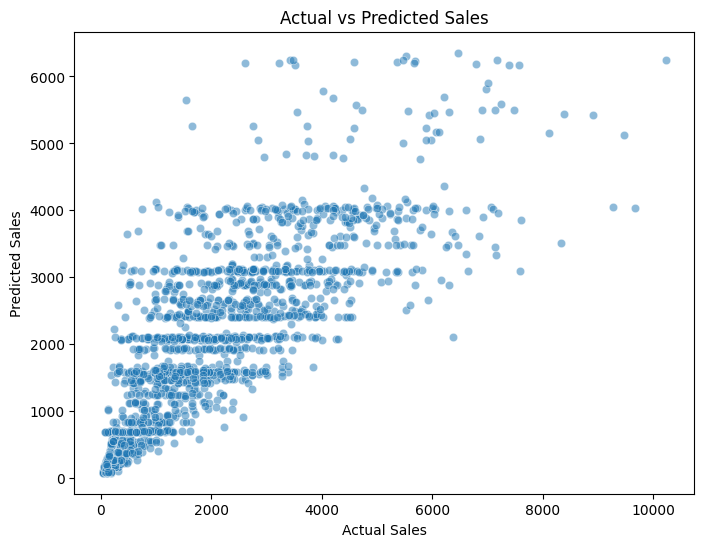

In [15]:
# Plot Predictions
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()